<a href="https://colab.research.google.com/github/amogh3892/3D-Biomedical-Image-Processing-Python-tutorial/blob/main/introMachineLearningPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning using Python
Biomedical Image Processing (EBME 361/461)

**Amogh Hiremath**<br>
*Graduate Research Assistant*<br> 
*Center of Computational Imaging and Personalized Diagnostics (CCIPD)*<br> 
*Case Western Reserve University*


### Importing required libraries/modules

The primary python package used for developing machine learning models in python is [scikit-learn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

Libraries such as pandas and numpy are particularly used to handle datasets.


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
!pip install statannot
from statannot import add_stat_annotation
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, auc, plot_roc_curve

### Reading and exploring the dataset.

In [2]:
# Reading the csv file as a pandas dataframe
df = pd.read_csv("prostateML.csv")

# Getting information of the dataset
df.info()

# Printing a few rows of the dataset
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Columns: 602 entries, PatientID to Label
dtypes: float64(600), int64(1), object(1)
memory usage: 526.9+ KB
       PatientID   Feature_0   Feature_1  ...  Feature_598  Feature_599  Label
0      Patient_0  252.070833  253.152778  ...     2.987543     2.987543      1
1      Patient_1  149.848000  151.838222  ...     3.063422     3.063422      0
2      Patient_2  152.319588  154.565865  ...     2.748509     2.748509      1
3      Patient_3  175.255429  178.099908  ...     4.451399     4.451399      1
4      Patient_4  136.816276  136.408745  ...     2.077021     2.077021      1
..           ...         ...         ...  ...          ...          ...    ...
107  Patient_107  189.620642  189.501851  ...     3.257004     3.257004      1
108  Patient_108  173.139682  172.773258  ...     7.201139     7.201139      1
109  Patient_109  205.135266  209.113795  ...     2.558845     2.558845      1
110  Patient_110  170.725275  1

In [3]:
# Basic statistics of the dataset
df.describe()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,...,Feature_561,Feature_562,Feature_563,Feature_564,Feature_565,Feature_566,Feature_567,Feature_568,Feature_569,Feature_570,Feature_571,Feature_572,Feature_573,Feature_574,Feature_575,Feature_576,Feature_577,Feature_578,Feature_579,Feature_580,Feature_581,Feature_582,Feature_583,Feature_584,Feature_585,Feature_586,Feature_587,Feature_588,Feature_589,Feature_590,Feature_591,Feature_592,Feature_593,Feature_594,Feature_595,Feature_596,Feature_597,Feature_598,Feature_599,Label
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,...,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,170.639837,172.115453,171.638178,12.188853,36.006176,-0.094190,-3.864805,-2.960625,-2.819907,-13.973596,-2.022771,-5.281601,0.011916,-0.487270,13.327963,-0.497970,-0.082685,-0.649870,5.790634,0.029048,406.762828,0.272850,0.205292,-0.268605,0.914435,64.200810,605.188218,4.673276,12.638955,222.110986,3.842582,3.622017,0.110765,7.334133,0.418697,0.274798,-0.110709,0.611186,53.793486,12.233809,...,3.142383,7.264404,3.123885,10.818531,3.172116,4.498158,9.241344,3.086970,2.656349,6.296282,8.193802,2.656290,7.189296,4.426067,8.051134,3.011920,8.777528,2.703223,4.031880,10.669333,2.854491,2.528825,4.298969,6.327670,2.568997,5.334358,3.191805,6.692326,2.876170,6.709276,2.563214,3.523991,7.549143,2.765084,3.236914,3.236914,3.236914,3.236914,3.236914,0.669643
std,33.623240,34.091421,33.971171,3.960293,11.576630,28.187023,22.956547,26.928408,27.470964,70.182825,83.899341,74.154913,3.551095,2.888848,4.460918,3.458413,2.826687,4.223441,0.250538,0.008295,105.285873,0.043294,0.045008,0.014115,0.018970,7.510556,128.972596,0.212345,2.008537,54.599986,0.259970,0.395368,0.037531,5.264252,0.083092,0.050762,0.021031,0.082441,13.645964,10.191291,...,0.662899,4.473159,1.456646,12.690162,0.652917,3.511315,10.057616,0.732276,0.556482,3.251037,9.302971,0.887660,3.591148,1.742131,3.888187,1.293249,9.474873,0.549937,2.575240,23.515952,0.959293,0.586754,2.019886,7.843846,0.826460,3.521737,1.072255,4.951928,1.169245,6.058150,0.565256,1.846784,12.450744,0.904112,1.678831,1.678831,1.678831,1.678831,1.678831,0.472456
min,97.494746,97.763589,97.600506,5.837088,17.065772,-75.536444,-79.086508,-65.589333,-99.985986,-238.778571,-230.333778,-173.121333,-13.338839,-9.801984,6.569165,-10.370667,-11.176799,-14.467794,5.140977,0.016600,211.396781,0.188789,0.111119,-0.299598,0.866030,47.407184,369.306348,4.195649,7.371406,127.432117,3.114469,2.357615,0.053299,1.453930,0.208893,0.180785,-0.169718,0.402284,26.044137,1.760782,...,1.824485,1.475765,1.389269,1.774737,2.137152,1.841189,1.807875,1.806813,1.717781,2.181534,1.561655,1.320574,2.253123,2.081941,2.536896,1.388704,1.697929,1.643432,1.394747,1.429696,1.269181,1.401720,1.727183,1.313143,1.245494,2.098137,1.809688,2.135016,1.239906,1.716330,1.553044,

In [4]:
# Class distribution in the dataset
print(df.groupby('Label').size())

Label
0    37
1    75
dtype: int64


In [5]:
# Accessing a particular row; use iloc
print(df.iloc[0])

PatientID      Patient_0
Feature_0        252.071
Feature_1        253.153
Feature_2        252.584
Feature_3        9.46021
                 ...    
Feature_596      2.98754
Feature_597      2.98754
Feature_598      2.98754
Feature_599      2.98754
Label                  1
Name: 0, Length: 602, dtype: object


In [6]:
# Accessing specific columns in the dataframe;  
print(df[["PatientID","Feature_0"]])


       PatientID   Feature_0
0      Patient_0  252.070833
1      Patient_1  149.848000
2      Patient_2  152.319588
3      Patient_3  175.255429
4      Patient_4  136.816276
..           ...         ...
107  Patient_107  189.620642
108  Patient_108  173.139682
109  Patient_109  205.135266
110  Patient_110  170.725275
111  Patient_111  199.093563

[112 rows x 2 columns]


In [7]:
# Example of filtering your dataset
# For example, let's say you only want to consider rows/ here patients with Feature_0 value > 150

print(f"Total rows beforing filtering: {df.shape}")

filtereddf = df[df["Feature_0"] > 150]

print(f"Total rows after filtering: {filtereddf.shape}")

print(filtereddf)

Total rows beforing filtering: (112, 602)
Total rows after filtering: (78, 602)
       PatientID   Feature_0   Feature_1  ...  Feature_598  Feature_599  Label
0      Patient_0  252.070833  253.152778  ...     2.987543     2.987543      1
2      Patient_2  152.319588  154.565865  ...     2.748509     2.748509      1
3      Patient_3  175.255429  178.099908  ...     4.451399     4.451399      1
5      Patient_5  183.958609  184.192748  ...     4.085701     4.085701      1
6      Patient_6  194.611111  200.821502  ...     3.100332     3.100332      1
..           ...         ...         ...  ...          ...          ...    ...
107  Patient_107  189.620642  189.501851  ...     3.257004     3.257004      1
108  Patient_108  173.139682  172.773258  ...     7.201139     7.201139      1
109  Patient_109  205.135266  209.113795  ...     2.558845     2.558845      1
110  Patient_110  170.725275  171.947327  ...     4.616491     4.616491      1
111  Patient_111  199.093563  199.750375  ...     4

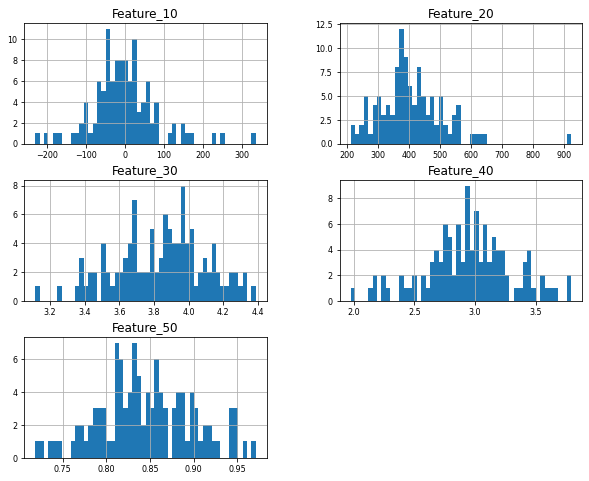

In [8]:
# Let's try to look at the histogram 5 different features
df5 = df[["Feature_10","Feature_20","Feature_30","Feature_40","Feature_50"]]
df5.hist(figsize=(10, 8), bins=50, xlabelsize=8, ylabelsize=8);

Feature selection 

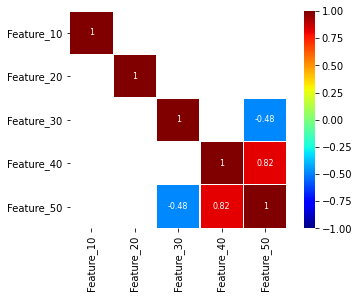

In [9]:
# Looking at correlation between the features.

corr = df5.corr()

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='jet', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=1.330e-03 stat=3.294e+00
1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=2.774e-01 stat=1.092e+00
1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=7.634e-01 stat=-3.018e-01
1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=5.222e-01 stat=6.419e-01
1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=5.446e-01 stat=6.078e-01


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe1e40f19d0>,
 [<statannot.StatResult.StatResult at 0x7fe1e4151050>])

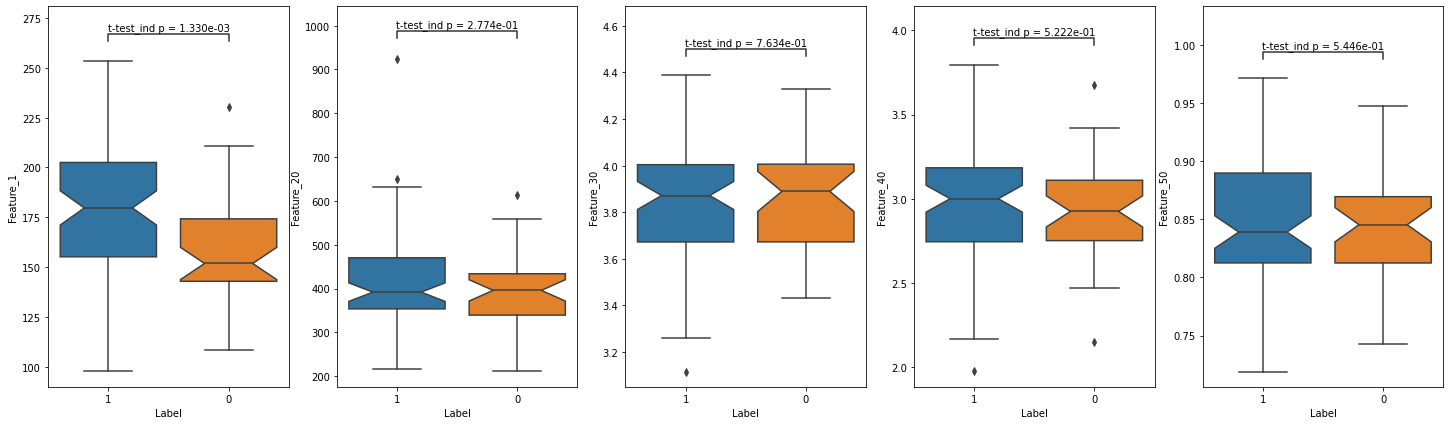

In [12]:
# Boxplots: looking at the distrbutions of the features  
df.Label = df.Label.astype(str)

plt.figure(figsize=(25,7))

x = "Label"
ys = ["Feature_1", "Feature_20", "Feature_30", "Feature_40", "Feature_50"]

plt.subplot(151)
ax1 = sns.boxplot(x = "Label", y = ys[0], notch=True, data=df)
add_stat_annotation(ax1, data=df, x=x, y=ys[0],
                    box_pairs = [("0","1")],
                    test='t-test_ind', text_format='full', loc='inside', verbose=2)


plt.subplot(152)
ax2 = sns.boxplot(x = "Label", y = ys[1], notch=True, data=df)
add_stat_annotation(ax2, data=df, x=x, y=ys[1],
                    box_pairs = [("0","1")],
                    test='t-test_ind', text_format='full', loc='inside', verbose=2)


plt.subplot(153)
ax3 = sns.boxplot(x = "Label", y = ys[2], notch=True, data=df)
add_stat_annotation(ax3, data=df, x=x, y=ys[2],
                    box_pairs = [("0","1")],
                    test='t-test_ind', text_format='full', loc='inside', verbose=2)


plt.subplot(154)
ax4 = sns.boxplot(x = "Label", y = ys[3], notch=True, data=df)
add_stat_annotation(ax4, data=df, x=x, y=ys[3],
                    box_pairs = [("0","1")],
                    test='t-test_ind', text_format='full', loc='inside', verbose=2)

plt.subplot(155)
ax5 = sns.boxplot(x = "Label", y = ys[4], notch=True, data=df)
add_stat_annotation(ax5, data=df, x=x, y=ys[4],
                    box_pairs = [("0","1")],
                    test='t-test_ind', text_format='full', loc='inside', verbose=2)

### Feature standardization/ normalization

Some of the classifiers do not behave as expected if the features are normalized since they expect a more of less normally distributed data. 

Therefore we normally ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.


In [13]:
# splitting the dataframe df into features, lables and patientids

if "PatientID" in df.columns:
  patientids = df.pop("PatientID")

if "Label" in df.columns:
  labels = df.pop("Label")

# normalizing the features by scikit-learn's StandardScaler
scaler = StandardScaler()
scaledFeatures = scaler.fit_transform(df.values)

print(f"Mean of first column: {scaledFeatures[:,0].mean()}, and standard deviation of first column: {scaledFeatures[:,0].std()}")


# Now we rescale these features between 0 and 1. 
scaler2 = MinMaxScaler()
scaled2Features = scaler2.fit_transform(scaledFeatures)

Mean of first column: -4.599495387732792e-16, and standard deviation of first column: 1.0


### Feature selection: Selecting K best features based on univariate analysis. 

There are several feature [selection methods](https://scikit-learn.org/stable/modules/feature_selection.html). Here we perform a simple Univariate feature selection to demonstrate the process of feature selection.  

Let's say we want to select 10 best features based on the univariate analysis.

In [14]:
# selecting 10 best features based on chi square test 
selector = SelectKBest(chi2, k=10)

print(f"Number of features before feature selection: {scaledFeatures.shape[1]}")

selectedFeatures = selector.fit_transform(scaled2Features,labels)

print(f"Number of features after feature selection: {selectedFeatures.shape[1]}")

Number of features before feature selection: 600
Number of features after feature selection: 10


1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=1.025e-03 stat=3.374e+00
1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=1.330e-03 stat=3.294e+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe1e45e44d0>,
 [<statannot.StatResult.StatResult at 0x7fe1d96fc610>])

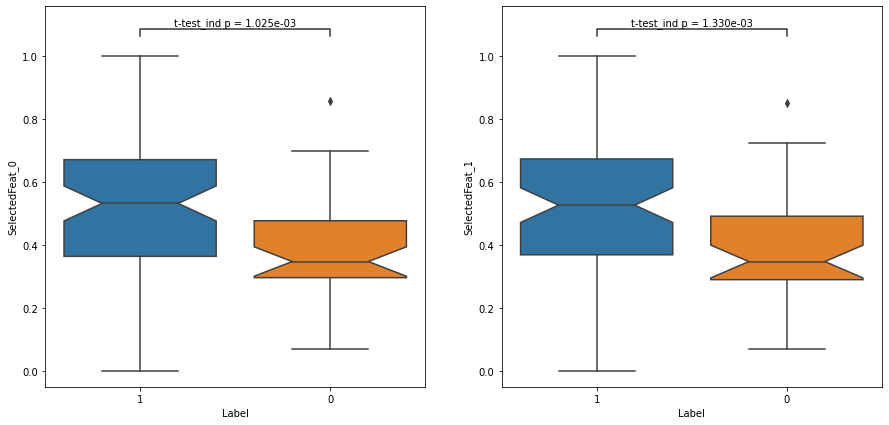

In [15]:
# Now let's look at the distribution of couple of these features as before
selectedFeatColumns = [f"SelectedFeat_{i}" for i in range(10)]
selecteddf = pd.DataFrame(selectedFeatures,columns=selectedFeatColumns)
selecteddf["Label"] = labels

plt.figure(figsize=(15,7))

plt.subplot(121)
ax1 = sns.boxplot(x = "Label", y = "SelectedFeat_0", notch=True, data=selecteddf)
add_stat_annotation(ax1, data=selecteddf, x=x, y="SelectedFeat_0",
                    box_pairs = [("0","1")],
                    test='t-test_ind', text_format='full', loc='inside', verbose=2)

plt.subplot(122)
ax2 = sns.boxplot(x = "Label", y = "SelectedFeat_1", notch=True, data=selecteddf)
add_stat_annotation(ax2, data=selecteddf, x=x, y="SelectedFeat_1",
                    box_pairs = [("0","1")],
                    test='t-test_ind', text_format='full', loc='inside', verbose=2)


***We can notice that these features are discriminable and are found to be statistically signficant between the classes (p<0.05)***




### Machine learning pipeline

Now let's try to use these pre-processing steps to create a machine learning piple. 

Here, we do a 10-fold cross validation on the dataset to demonstrate the results. 


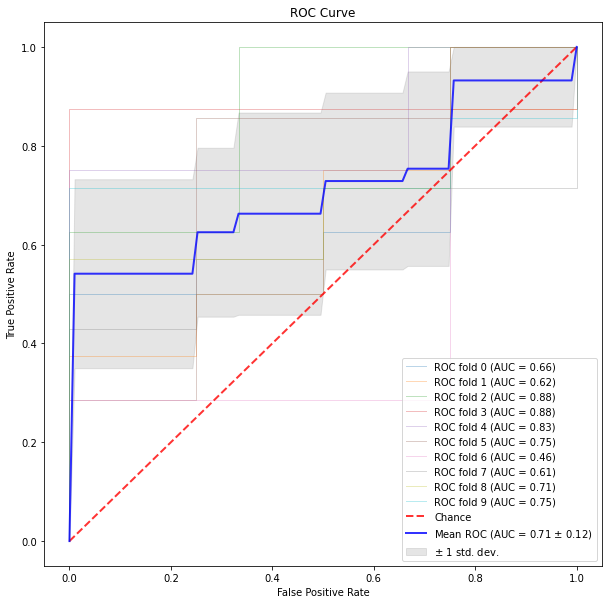

In [18]:

# Partition the data in k folds; by making sure the split is stratified according to the class labels
skf = StratifiedKFold(n_splits=10)

X = df.values
y = labels 


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(10,10))

# looping over different cross validation folds. 
for i,(train_index, test_index) in enumerate(skf.split(X, y)):

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]


  # difining the classifier along with the pre-processing pipeline.
  clf = make_pipeline(StandardScaler(),
                MinMaxScaler(),
                SelectKBest(chi2,k=30),
                LogisticRegression())

  # training the classifier on the training set
  clf.fit(X_train,y_train)


  # evaluating the classifier on the test set and plotting ROC curve 
  viz = plot_roc_curve(clf, X_test, y_test,
                        name=f'ROC fold {i}',
                        alpha=0.3, lw=1, ax=ax)
  

  interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
  interp_tpr[0] = 0.0
  tprs.append(interp_tpr)
  aucs.append(viz.roc_auc)


ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC Curve")
ax.legend(loc="lower right")
plt.show()